##MNIST FASHION DATASET autoencoder

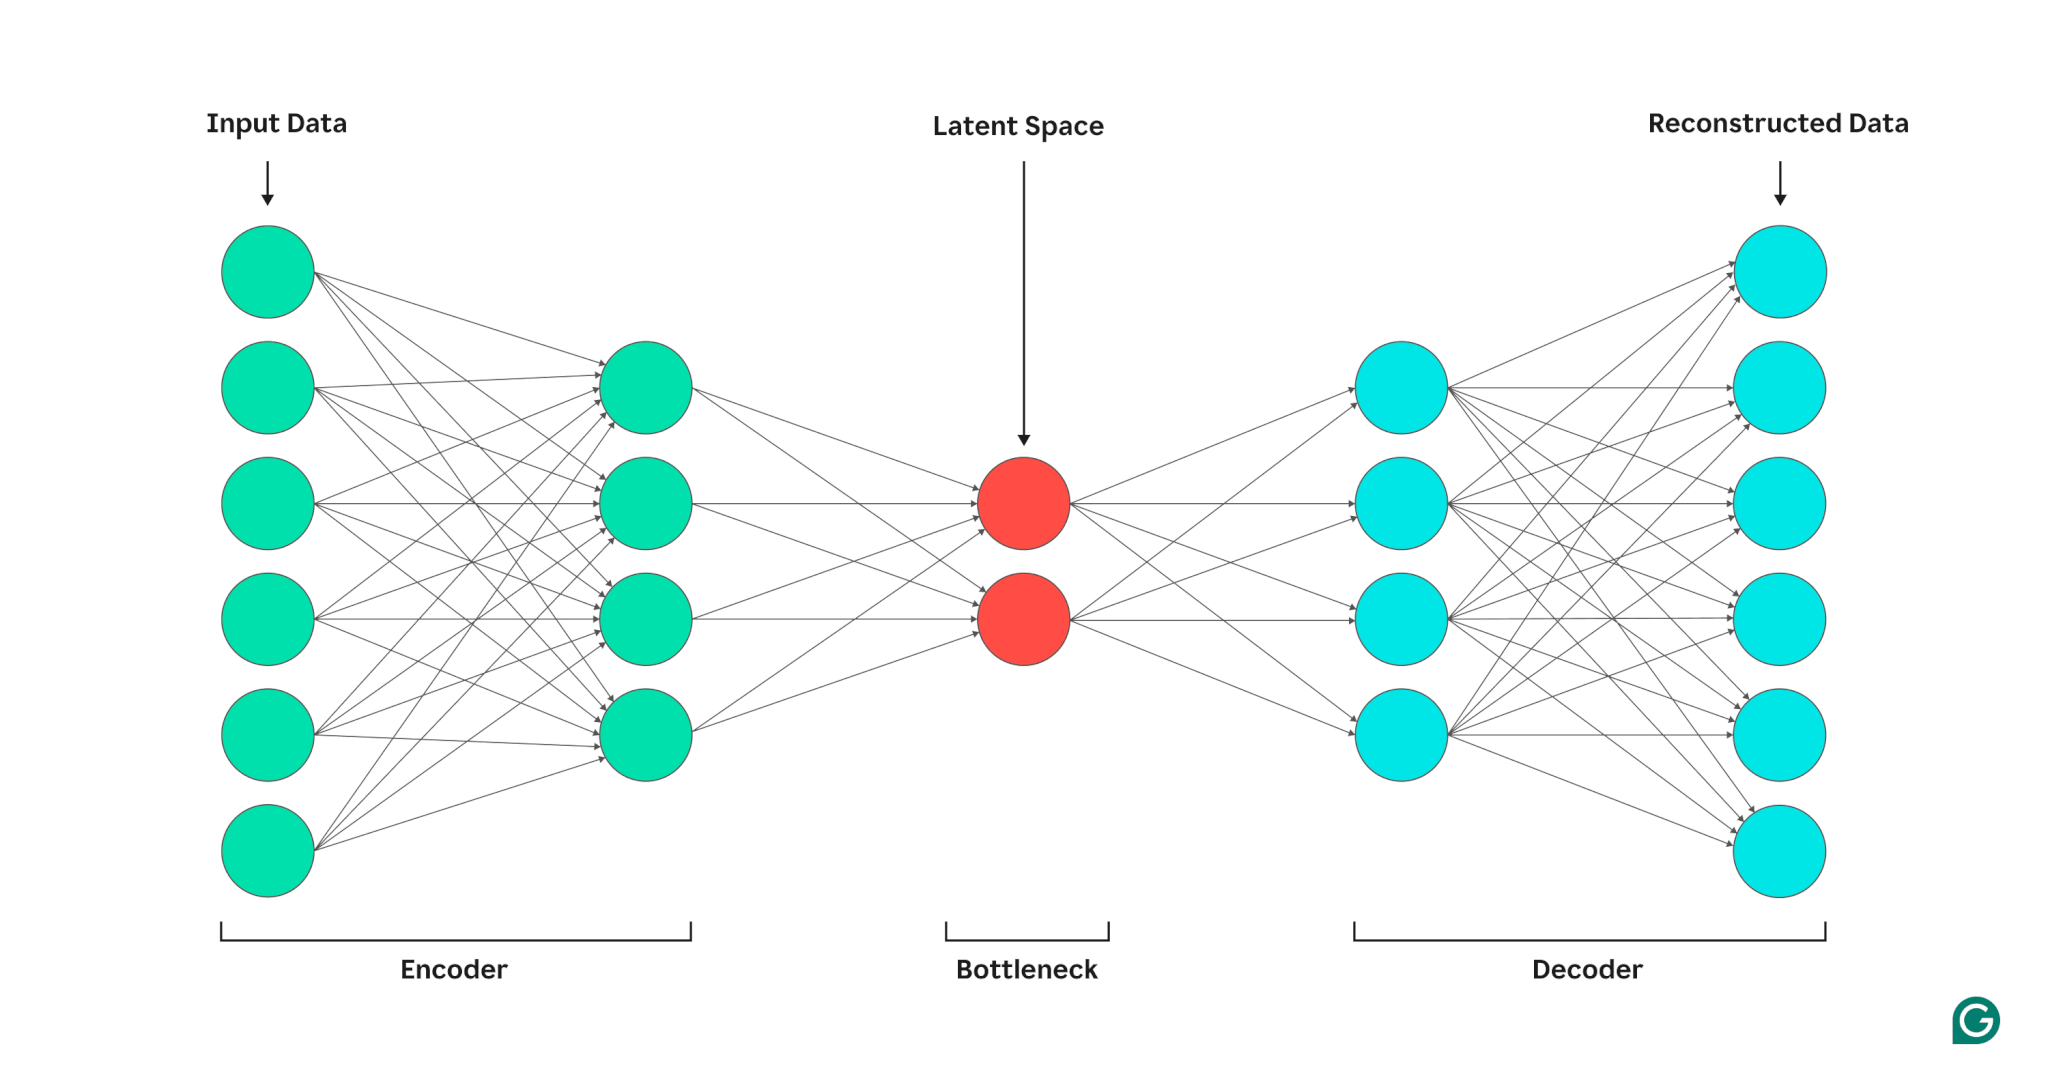

Importing libraries

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
(x_train,_),(x_test,_)=keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

2. Flatten the image

In [ ]:
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

Neural Network building
1define the autoencoder architecture

In [ ]:
input_img=Input(shape=(784,)) #784=28x28
encoded=Dense(128,activation="relu")(input_img)
decoded=Dense(784,activation="sigmoid")(encoded)

In [ ]:
autoencoder=Model(input_img,decoded)

Compile the Autoencoder

In [ ]:
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

Train the autoencoder

In [ ]:
autoencoder.fit(x_train,x_train,epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3419 - val_loss: 0.2780
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2734 - val_loss: 0.2708
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2674 - val_loss: 0.2675
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2655 - val_loss: 0.2661
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2629 - val_loss: 0.2655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2629 - val_loss: 0.2646
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2621 - val_loss: 0.2645
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2615 - val_loss: 0.2642
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2611 - val_loss: 0.2639
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2610 - val_loss: 0.2638


In [ ]:
decoded_imgs=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,850 (2.31 MB)

 Trainable params: 201,616 (787.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,234 (1.54 MB)

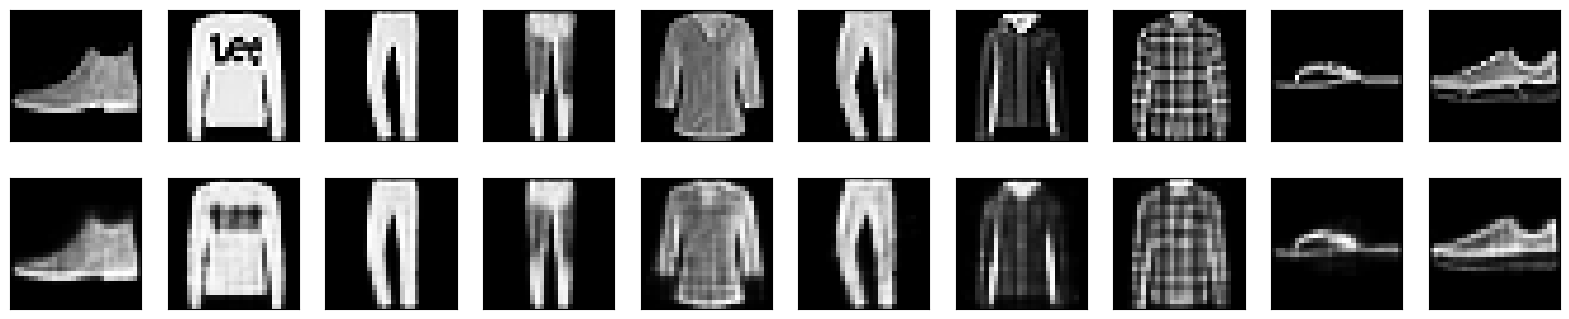

In [ ]:
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##MNIST DIGIT DATASET autoencoder

import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Only include this line if you're running in a Jupyter notebook or Colab
# %matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
(trainX, trainY),(testX,testY)=mnist.load_data()
print('Train shape:',trainX.shape)
print('Test shape:',testX.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


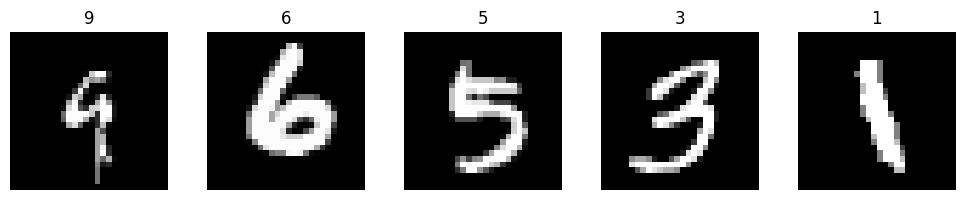

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(trainx, trainy), (_, _) = mnist.load_data()

# Plot 5 random images
plt.figure(figsize=(10, 2))
for j in range(5):
    i = np.random.randint(0, len(trainx))  # Random index
    plt.subplot(1, 5, j + 1)
    plt.imshow(trainx[i], cmap="gray")
    plt.title(str(trainy[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
train_data=np.reshape(trainX,(60000,28*28))
test_data=np.reshape(testX,(10000,28*28))

print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_data = Input(shape=(784,))

# Encoder layers
encoder = Dense(100, activation='relu')(input_data)
encoder = Dense(50, activation='relu')(encoder)
encoder = Dense(25, activation='relu')(encoder)
encoded = Dense(2)(encoder)


In [ ]:
decoder = Dense(25, activation='relu')(encoder)
decoder = Dense(50, activation='relu')(decoder)
decoder = Dense(100, activation='relu')(decoder)
decoder = Dense(784)(decoder)

In [ ]:
autoencoder = Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    100,480 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 784)       │    101,136 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 201,616 (787.56 KB)

 Trainable params: 201,616 (787.56 KB)

 Non-trainable params: 0 (0.00 B)

train the model

In [ ]:
train_data = train_data.reshape(-1, 784).astype("float32") / 255.
test_data = test_data.reshape(-1, 784).astype("float32") / 255.

history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=256,
    validation_data=(test_data, test_data)
)


Epoch 1/50


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m133112233751376\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)\n  • training=True\n  • mask=None'

In [ ]:
import matplotlib.pyplot as plt
encoded_imgs=autoencoder.predict(test_data)

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(test_data[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(encoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()